In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
import graphviz
import numpy as np
import pandas as pd
import pydotplus
import scipy.stats as stats
import timeit
from sklearn.utils import column_or_1d 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_excel("Telecom.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data exploration & visualization

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see that there are a total of 7043 observers.

The % distribution of Gender is: 
Male      50.0
Female    50.0
Name: gender, dtype: float64


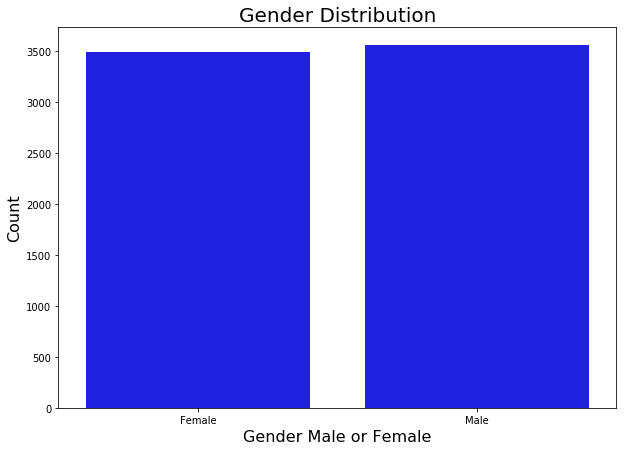

Male      3555
Female    3488
Name: gender, dtype: int64

In [4]:
# Gender 

print("The % distribution of Gender is: ")
print(round(df['gender'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(df["gender"], color='blue')
g.set_title("Gender Distribution", fontsize=20)
g.set_ylabel('Count', fontsize=16)
g.set_xlabel('Gender Male or Female', fontsize=16)

plt.show()

df['gender'].value_counts()

We can see that 50% of employees are male and 50% are female. This means this dataset is a balanced data set.

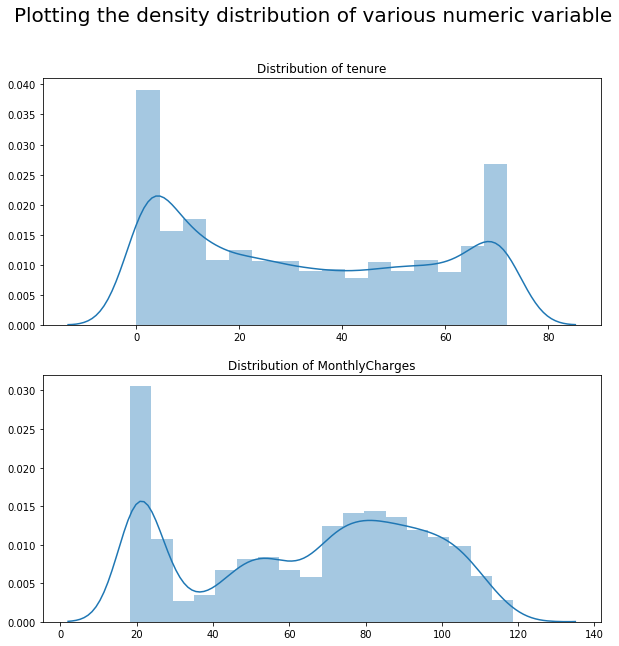

In [5]:
def draw_subplots(var_Name,tittle_Name,nrow=1,ncol=1,idx=1,fz=10): # Define a common module for drawing subplots.
    ax = plt.subplot(nrow,ncol,idx)                   #  idx - position of subplot in the main plotting window
    ax.set_title('Distribution of '+var_Name)         #  fz - the font size of Tittle in the main plotting window
    plt.suptitle(tittle_Name, fontsize=fz)

numeric_columns = ['tenure', 'MonthlyCharges']

fig,ax = plt.subplots(1,1, figsize=(10,10))
j=0  # reset the counter to plot 
title_Str="Plotting the density distribution of various numeric variable"

for i in numeric_columns:
    j +=1
    draw_subplots(i,title_Str,2,1,j,20) # create a 1x3 subplots for plotting distribution plots
    sns.distplot(df[i])
    plt.xlabel('')

We can get some conclusion from Density plots.First,the Tenure is not normally distribute.The distribution of data is high on both sides and low in the middle.Secondly, the MonthlyCharges is also not normally distribute.This distribution is relatively high at 20, and after 40,this part is generally in a normal distribution trend.

# Convert some categorical variables to numerical variables

In [6]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 2,'Yes': 1, 'No': 0})
df['InternetService'] = df['InternetService'].map({'DSL': 2,'Fiber optic': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['Contract'] = df['Contract'].map({'Two year': 2,'One year': 1, 'Month-to-month': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['PaymentMethod'] = df['PaymentMethod'].map({'Credit card (automatic)': 3,'Electronic check': 2,'Mailed check': 1, 'Bank transfer (automatic)': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


# Holdout (splitting data)

In [7]:
x = df[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','Churn']]
y = df[['gender']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# 1.Select Kbest

In [8]:
from sklearn import linear_model, decomposition, datasets
logistic = linear_model.LogisticRegression()
kbest = SelectKBest(chi2)
pca = decomposition.PCA()
pipe = Pipeline(steps=[('kbest', kbest), ('logistic', logistic)])

n_components = [3,4,5,6,7,8]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(kbest__k=n_components,
                              logistic__C=Cs))
aaa = estimator.fit(x_train, y_train)

print(" Best_score： %.4lf" %estimator.best_score_)

print(" Best_params：", estimator.best_params_)


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

 Best_score： 0.5004
 Best_params： {'kbest__k': 6, 'logistic__C': 0.0001}


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Here I got the result: the best k = 6.It means that we only keep six veriables. The next step is find out the six variables.

In [9]:
x_new = SelectKBest(score_func=chi2, k=6)
x_new.fit_transform(x_train, y_train)
print(x_new.get_support())

[False False False False False False  True  True False  True  True  True
 False False False False  True False]


Therefore, the six variables are:
'InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','MonthlyCharges'

In [10]:
X = df[['InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','MonthlyCharges']]
Y = df['gender']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

## Model 1: Decision Tree Model

### Criterion: Entropy (Information Gain)

In [11]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
    decision_tree.fit(X_train,Y_train)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X_train, Y_train, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 50.79%.

Depth: 2
Model Performance: 50.13%.

Depth: 3
Model Performance: 50.44%.

Depth: 4
Model Performance: 49.92%.

Depth: 5
Model Performance: 51.26%.

Depth: 6
Model Performance: 50.67%.

Depth: 7
Model Performance: 50.37%.

Depth: 8
Model Performance: 50.32%.

Depth: 9
Model Performance: 49.96%.

Depth: 10
Model Performance: 50.29%.

--- Runtime: 13.879179076923077 seconds. ---


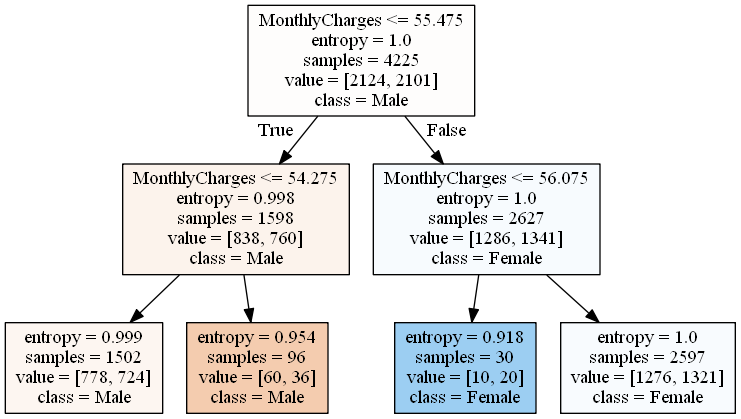

In [12]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
decision_tree.fit(X_train,Y_train)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
start_time = timeit.default_timer()

decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
dtmodel=decision_tree.fit(X_train,Y_train)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.32401558974358835 seconds. ---


### Cross validation

In [14]:
scores = cross_val_score(decision_tree, X_train, Y_train, cv=10)
print(scores)

[0.52358491 0.53900709 0.48699764 0.49172577 0.50947867 0.50236967
 0.49526066 0.46445498 0.47393365 0.52606635]


### Classification_report and Confusion matrix

In [15]:
Y_pred = dtmodel.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.5007097232079489
             precision    recall  f1-score   support

          0       0.39      0.51      0.44      1082
          1       0.62      0.49      0.55      1736

avg / total       0.53      0.50      0.51      2818

Confusion matrix:
[[553 878]
 [529 858]]


## Model 2: Random forest model

In [16]:
rfc = ensemble.RandomForestClassifier()
dtmodel_R=rfc.fit(X_test, Y_test)
names_importances = {}
for feature, importance in zip(X_test.columns, rfc.feature_importances_):
    names_importances[feature] = importance
    names_importances_desc = sorted(names_importances.items(), key=lambda x: x[1], reverse=True)
    names_importances_desc = pd.DataFrame(names_importances_desc, columns=['feature','importance'])
names_importances_desc

,feature,importance
0,MonthlyCharges,0.958264
1,OnlineSecurity,0.011928
2,TechSupport,0.010548
3,DeviceProtection,0.008241
4,StreamingTV,0.007046
5,InternetService,0.003972


In [17]:
start_time = timeit.default_timer()

rfc = ensemble.RandomForestClassifier()
dtmodel_R=rfc.fit(X_test, Y_test)
names_importances = {}
for feature, importance in zip(X_test.columns, rfc.feature_importances_):
    names_importances[feature] = importance
    names_importances_desc = sorted(names_importances.items(), key=lambda x: x[1], reverse=True)
    names_importances_desc = pd.DataFrame(names_importances_desc, columns=['feature','importance'])
names_importances_desc
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.06067610256410205 seconds. ---


### Cross validation

In [18]:
scores = cross_val_score(rfc, X_train, Y_train, cv=10)
print(scores)

[0.51650943 0.5035461  0.55791962 0.4964539  0.53791469 0.48815166
 0.5        0.47156398 0.49052133 0.492891  ]


### Classification_report and Confusion matrix

In [19]:
Y_pred = dtmodel_R.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8399574166075231
             precision    recall  f1-score   support

          0       0.86      0.83      0.84      1478
          1       0.82      0.85      0.83      1340

avg / total       0.84      0.84      0.84      2818

Confusion matrix:
[[1229  202]
 [ 249 1138]]


## Model 3: KNN Classification 

In [20]:
neighbors = KNeighborsClassifier(n_neighbors=3)
model_neighbors = neighbors.fit(X_test, Y_test)

In [21]:
start_time = timeit.default_timer()

neighbors = KNeighborsClassifier(n_neighbors=3)
model_n = neighbors.fit(X_test, Y_test)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.006035692307690965 seconds. ---


### Cross validation

In [22]:
scores = cross_val_score(neighbors, X_train, Y_train, cv=10)
print(scores)

[0.51650943 0.47044917 0.4893617  0.4893617  0.50473934 0.52369668
 0.507109   0.45734597 0.52843602 0.49526066]


### Classification_report and Confusion matrix

In [23]:
Y_pred = model_neighbors.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.7097232079489
             precision    recall  f1-score   support

          0       0.75      0.70      0.72      1539
          1       0.67      0.72      0.69      1279

avg / total       0.71      0.71      0.71      2818

Confusion matrix:
[[1076  355]
 [ 463  924]]


## 4. Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
model_bayes = bayes.fit(X_test, Y_test)

In [25]:
start_time = timeit.default_timer()

bayes = GaussianNB()
model_bayes = bayes.fit(X_test, Y_test)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.0038346666666697615 seconds. ---


### Cross validation

In [26]:
scores = cross_val_score(bayes, X_train, Y_train, cv=10)
print(scores)

[0.48584906 0.4822695  0.47754137 0.4893617  0.48578199 0.49526066
 0.51421801 0.51658768 0.45734597 0.46682464]


### Classification_report and Confusion matrix

In [27]:
Y_pred = model_bayes.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.5010645848119234
             precision    recall  f1-score   support

          0       0.37      0.51      0.43      1031
          1       0.64      0.49      0.56      1787

avg / total       0.54      0.50      0.51      2818

Confusion matrix:
[[528 903]
 [503 884]]


## 5. Logistic regression

In [28]:
logreg = LogisticRegression()
model_logreg = logreg.fit(X_test, Y_test)

In [29]:
start_time = timeit.default_timer()

logreg = LogisticRegression()
model_logreg = logreg.fit(X_test, Y_test)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.009099076923078542 seconds. ---


### Cross validation

In [30]:
scores = cross_val_score(logreg, X_train, Y_train, cv=10)
print(scores)

[0.49764151 0.4893617  0.47754137 0.5106383  0.48578199 0.50947867
 0.52369668 0.46208531 0.48578199 0.46445498]


### Classification_report and Confusion matrix

In [31]:
Y_pred = model_logreg.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.5227111426543648
             precision    recall  f1-score   support

          0       0.60      0.53      0.56      1628
          1       0.44      0.52      0.48      1190

avg / total       0.53      0.52      0.53      2818

Confusion matrix:
[[857 574]
 [771 616]]


## 6. SVC

In [32]:
svc = SVC(kernel='linear')
model_svc = svc.fit(X_train, y_train)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
start_time = timeit.default_timer()

svc = SVC(kernel='linear')
model_sve = svc.fit(X_train, y_train)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- Runtime: 3.113205743589745 seconds. ---


### Cross validation

In [34]:
scores = cross_val_score(svc, X_train, Y_train, cv=10)
print(scores)

[0.50471698 0.47754137 0.46572104 0.47990544 0.50236967 0.47630332
 0.492891   0.46919431 0.48341232 0.46445498]


### Classification_report and Confusion matrix

In [35]:
Y_pred = model_svc.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.4978708303761533
             precision    recall  f1-score   support

          0       0.70      0.50      0.59      1980
          1       0.29      0.48      0.36       838

avg / total       0.58      0.50      0.52      2818

Confusion matrix:
[[998 433]
 [982 405]]


## 7. Gradient Boosting Classifiers

In [36]:
params = {'n_estimators': 500,
          'max_depth': 2}

gb = ensemble.GradientBoostingRegressor(**params)
model_gb = gb.fit(X_train, y_train)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
start_time = timeit.default_timer()

gb = ensemble.GradientBoostingRegressor(**params)
model_gb = gb.fit(X_train, y_train)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- Runtime: 0.4281403076923169 seconds. ---


### Cross validation

In [38]:
scores = cross_val_score(gb, X_train, Y_train, cv=10)
print(scores)

[-0.05234826 -0.01365896 -0.04776588 -0.03180262 -0.0345525  -0.06360128
 -0.03637213 -0.02272582 -0.05174659 -0.05921452]


# PCA

In [44]:
from sklearn import linear_model, decomposition, datasets
from sklearn.decomposition import PCA

x = df[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','Churn']]
y = df[['gender']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

n_components = [3,4,5,6,7,8]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(x_train, y_train)

print(" Best_score： %.4lf" %estimator.best_score_)

print(" Best_params：", estimator.best_params_)


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

 Best_score： 0.5148
 Best_params： {'logistic__C': 1.0, 'pca__n_components': 3}


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Here I got the result: pca__n_components = 3.It means that we now have three new features.

In [45]:
pca = PCA(n_components=3)
x_transformed = pd.DataFrame(pca.fit_transform(x))
X_train, X_test, Y_train, Y_test = train_test_split(x_transformed, y, test_size=0.4, random_state=0)
print(x_transformed)

              0          1         2
0    -44.878700 -13.621108  2.732244
1     -6.351884   4.753345  1.462658
2    -22.768442 -22.905422  1.034717
3    -14.933509  20.947100  2.347313
4     -7.506836 -30.087243  0.700469
5     21.212651 -36.899691 -1.214986
6     17.634514 -19.766472 -0.049578
7    -41.154562  -5.438664  2.879722
8     34.370934 -20.976122 -1.291436
9      4.831076  30.420376  2.074610
10   -21.604811 -11.300100  1.706290
11   -48.482613   4.778350 -1.915676
12    43.122027   8.057632 -0.199517
13    42.300665  -1.520097 -0.888638
14    33.707178 -23.971202 -1.889187
15    59.439919  12.611396 -1.536387
16   -31.641552  36.591788 -1.171857
17    54.373330  17.170008 -0.774234
18   -18.137732 -16.237026  1.186113
19    18.051645 -21.062914 -0.695536
20   -36.021304 -17.784563  1.995696
21   -49.427179   0.793105 -2.150772
22   -53.793227  -9.347211 -2.197857
23     6.550401  25.229083  2.141787
24     2.419811  17.188335  1.619103
25    -9.549677   1.810823  1.535932
2

## Model 1: Decision Tree Model

### Criterion: Entropy (Information Gain)

In [46]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
    decision_tree.fit(X_train,Y_train)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X_train, Y_train, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 50.08%.

Depth: 2
Model Performance: 49.61%.

Depth: 3
Model Performance: 49.47%.

Depth: 4
Model Performance: 50.91%.

Depth: 5
Model Performance: 50.67%.

Depth: 6
Model Performance: 49.80%.

Depth: 7
Model Performance: 50.04%.

Depth: 8
Model Performance: 50.79%.

Depth: 9
Model Performance: 50.22%.

Depth: 10
Model Performance: 50.41%.

--- Runtime: 11.95627897435898 seconds. ---


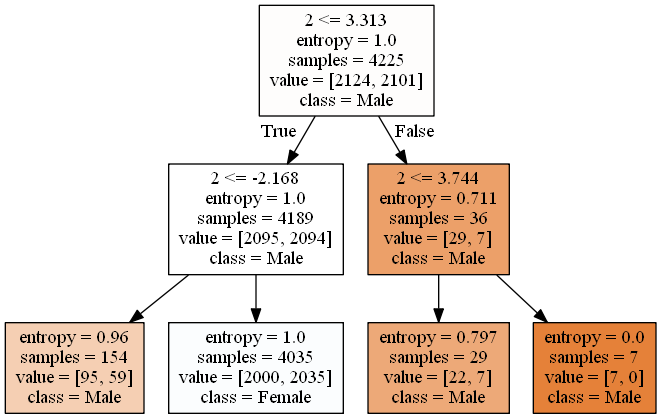

In [47]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
decision_tree.fit(X_train,Y_train)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [48]:
start_time = timeit.default_timer()

decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
dtmodel=decision_tree.fit(X_train,Y_train)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.30822358974359076 seconds. ---


### Cross validation

In [49]:
scores = cross_val_score(decision_tree, X_train, Y_train, cv=10)
print(scores)

[0.50471698 0.49881797 0.49408983 0.49881797 0.49526066 0.48815166
 0.49763033 0.50236967 0.48341232 0.49763033]


### Classification_report and Confusion matrix

In [50]:
Y_pred = dtmodel.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.49609652235628104
             precision    recall  f1-score   support

          0       0.05      0.54      0.10       143
          1       0.95      0.49      0.65      2675

avg / total       0.91      0.50      0.62      2818

Confusion matrix:
[[  77 1354]
 [  66 1321]]


## Model 2: Random forest model

In [51]:
rfc = ensemble.RandomForestClassifier()
dtmodel_R=rfc.fit(X_test, Y_test)
names_importances = {}
for feature, importance in zip(X_test.columns, rfc.feature_importances_):
    names_importances[feature] = importance
    names_importances_desc = sorted(names_importances.items(), key=lambda x: x[1], reverse=True)
    names_importances_desc = pd.DataFrame(names_importances_desc, columns=['feature','importance'])
names_importances_desc

C:\Users\mzz00\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,feature,importance
0,1,0.339098
1,0,0.334886
2,2,0.326016


### Cross validation

In [52]:
scores = cross_val_score(rfc, X_train, Y_train, cv=10)
print(scores)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

[0.51886792 0.5106383  0.46808511 0.50118203 0.51658768 0.52843602
 0.52132701 0.51658768 0.5450237  0.47867299]


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


### Classification_report and Confusion matrix

In [53]:
Y_pred = dtmodel_R.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9751596877217885
             precision    recall  f1-score   support

          0       0.99      0.96      0.98      1467
          1       0.96      0.99      0.97      1351

avg / total       0.98      0.98      0.98      2818

Confusion matrix:
[[1414   17]
 [  53 1334]]


## Model 3: KNN Classification

In [54]:
neighbors = KNeighborsClassifier(n_neighbors=3)
model_neighbors = neighbors.fit(X_test, Y_test)

C:\Users\mzz00\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [55]:
start_time = timeit.default_timer()

neighbors = KNeighborsClassifier(n_neighbors=3)
model_n = neighbors.fit(X_test, Y_test)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.0056828717948747 seconds. ---


C:\Users\mzz00\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### Cross validation

In [56]:
scores = cross_val_score(neighbors, X_train, Y_train, cv=10)
print(scores)

[0.47641509 0.51536643 0.52245863 0.47044917 0.49763033 0.48104265
 0.51658768 0.492891   0.53080569 0.51895735]


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

### Classification_report and Confusion matrix

In [57]:
Y_pred = model_neighbors.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.7498225691980128
             precision    recall  f1-score   support

          0       0.77      0.75      0.76      1466
          1       0.73      0.75      0.74      1352

avg / total       0.75      0.75      0.75      2818

Confusion matrix:
[[1096  335]
 [ 370 1017]]


## 4. Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
model_bayes = bayes.fit(X_test, Y_test)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
start_time = timeit.default_timer()

bayes = GaussianNB()
model_bayes = bayes.fit(X_test, Y_test)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.004253538461540529 seconds. ---


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Cross validation

In [60]:
scores = cross_val_score(bayes, X_train, Y_train, cv=10)
print(scores)

[0.5        0.50118203 0.49881797 0.4964539  0.47156398 0.53080569
 0.51895735 0.5        0.49052133 0.54739336]


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

### Classification_report and Confusion matrix

In [61]:
Y_pred = model_bayes.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.5255500354861604
             precision    recall  f1-score   support

          0       0.71      0.52      0.60      1948
          1       0.33      0.53      0.41       870

avg / total       0.60      0.53      0.54      2818

Confusion matrix:
[[1021  410]
 [ 927  460]]


## 5. Logistic regression

In [62]:
logreg = LogisticRegression()
model_logreg = logreg.fit(X_test, Y_test)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
start_time = timeit.default_timer()

logreg = LogisticRegression()
model_logreg = logreg.fit(X_test, Y_test)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.00684061538458991 seconds. ---


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Cross validation

In [64]:
scores = cross_val_score(logreg, X_train, Y_train, cv=10)
print(scores)

[0.52122642 0.52718676 0.5035461  0.52009456 0.48815166 0.53317536
 0.52132701 0.507109   0.46208531 0.52369668]


C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

### Classification_report and Confusion matrix

In [65]:
Y_pred = model_logreg.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.517388218594748
             precision    recall  f1-score   support

          0       0.74      0.52      0.61      2061
          1       0.28      0.52      0.37       757

avg / total       0.62      0.52      0.54      2818

Confusion matrix:
[[1066  365]
 [ 995  392]]


## 6. SVC

In [66]:
svc = SVC(kernel='linear')
model_svc = svc.fit(X_train, y_train)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
start_time = timeit.default_timer()

svc = SVC(kernel='linear')
model_sve = svc.fit(X_train, y_train)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- Runtime: 4.644185025640979 seconds. ---


### Cross validation

In [68]:
scores = cross_val_score(svc, X_train, Y_train, cv=10)
print(scores)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.50471698 0.5035461  0.50827423 0.5035461  0.51184834 0.5
 0.51421801 0.50473934 0.47393365 0.52843602]


### Classification_report and Confusion matrix

In [69]:
Y_pred = model_svc.predict(X_test) 
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.5031937544357701
             precision    recall  f1-score   support

          0       0.49      0.51      0.50      1371
          1       0.52      0.50      0.51      1447

avg / total       0.50      0.50      0.50      2818

Confusion matrix:
[[701 730]
 [670 717]]


## 7. Gradient Boosting Classifiers

In [70]:
params = {'n_estimators': 500,
          'max_depth': 2}

gb = ensemble.GradientBoostingRegressor(**params)
model_gb = gb.fit(X_train, y_train)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
start_time = timeit.default_timer()

gb = ensemble.GradientBoostingRegressor(**params)
model_gb = gb.fit(X_train, y_train)
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- Runtime: 0.5225152820513017 seconds. ---


### Cross validation

In [72]:
scores = cross_val_score(gb, X_train, Y_train, cv=10)
print(scores)

C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mzz00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[-0.06020204 -0.05497773 -0.03696489 -0.03787248 -0.04128519 -0.06322415
 -0.00988504 -0.00955208 -0.05783553 -0.04747165]


# write-up analysis and conclusions

We used teo methods to process the variables: Select kbest and PCA. And we used seven models on both of them: Decesion tree model, Random forest model, KNN Classification, Naive Bayes Classifier, Logistic regression, SVC and Gradient Boosting Classifiers.

From the classification report, we can see that: Almost for all models, PCA is more accurate than the Select kbest method,since the accuracy value is larger. So PCA is more suitable for this dataset.

For Select kbest method, Random forest model has the largest accuracy value(0.83).This means that base on Select kbest method, Random forest model can classify our data sets more accurately. For time execution, SVC takes the longest time(3.11s) and Naive Bayes Classifier takes the shortest time(0.005s).

For PCA, Random forest model has the largest accuracy value(0.97).This means that base on Select kbest method, Random forest model can classify our data sets more accurately. For time execution, SVC takes the longest time(5.6s) and Naive Bayes Classifier takes the shortest time(0.004s).